# Reproducing the figure-8 solution to the three-body problem using Julia

**Students**: Ma. Janelle Manuel & Carl Justin Palpal-latoc

**Objective**: To reproduce the figure-8 solution to the three-body problem

**Project Learning Objectives**:
1. Learn how to formulate a physical system (particularly the three-body problem) as a computational problem (particularly by numerically solving the corresponding differential equations)
2. Learn how Julia can be more advantageous than Python when it comes to simulating physical systems

 
**Key Results**: 
1. Implement an ODE solver using the RK4 method.
2. Plot the solution to the three-body problem (when the particles are of equal masses) obtained using RK4 method, particularly replicate the figure-8 plot [1].
3. Quantify the efficiency of Python against Julia in reproducing the figure-8 plot.


**Importance in physics**: 
N-body interactions are ubiquitous in nature. The case of N=3 has no closed general solution [2]  (elevating the importance of numerical methods) but it is not difficult to imagine a situation dominated particularly by N=3 interacting bodies (e.g. moon-earth-spacecraft or moon-earth-sun).  


**References**: 
1. Chenciner, Alain; Montgomery, Richard (2000). "A remarkable periodic solution of the three-body problem in the case of equal masses". Annals of Mathematics. Second Series. 152 (3): 881–902. doi:10.2307/2661357.
2. Barrow-Green, June (2008), "The Three-Body Problem", in Gowers, Timothy; Barrow-Green, June; Leader, Imre (eds.), The Princeton Companion to Mathematics, Princeton University Press, pp. 726–728.


### KR1: Implement an ODE solver using the RK4 method

We first the initial conditions of our three-body problem.

In [1]:
masses = [1,1,1]
x = [-0.97000436,0.,0.97000436]
y= [0.24208753,0.,-0.24208753]
vx = [0.4662036850,-0.933240737,0.4662036850]
vy= [0.4323657300,-0.86473146,0.4323657300]
tspan = range(0, 10,length = 1000)
step = tspan[2]-tspan[1]


states = [x,y,vx,vy]

4-element Vector{Vector{Float64}}:
 [-0.97000436, 0.0, 0.97000436]
 [0.24208753, 0.0, -0.24208753]
 [0.466203685, -0.933240737, 0.466203685]
 [0.43236573, -0.86473146, 0.43236573]

We then create the derivative function for the three-body problem.

In [2]:
function f(masses, states,G) 
    x,y,vx,vy = deepcopy(states)
        
    total_change = deepcopy(states)
    
    for i in 1:3
        
        #We get the initial positions and velocity changes for each planet
        xi_0 = x[i]
        yi_0 = y[i] 
        dxvel = 0.0 
        dyvel = 0.0
        for j in 1:3 
            
            #Per planet, we calculate the distance from the others and compute the change in velocities
            if i != j #We avoid calculating distance to itself
                distance = sqrt((xi_0-x[j])^2+(yi_0-y[j])^2) #euclidean distance
                
                dxvel = dxvel - G*masses[j]*(xi_0 - x[j])/distance^3 #change in velocity from each mass on mass n
                dyvel = dyvel - G*masses[j]*(yi_0 - y[j])/distance^3
            end
        end
        
        #We record the change in velocities per planet
        total_change[3][i] = dxvel
        total_change[4][i] = dyvel
        
    end
    
    #Finally we record the change in positions
    total_change[1] = vx
    total_change[2] = vy  
    return total_change 
end

f (generic function with 1 method)

We first create the RK4 function which takes us from $x(t)$ to $y(t + \Delta t)$,   $y(t)$ to $y(t + \Delta t)$, $x'(t)$ to $x'(t + \Delta t)$,   $y'(t)$ to $y'(t + \Delta t)$.

In [3]:
function RK4!(masses, states, step,G=6.67408313131313e-11) 
    k1 = f(masses, states, G)*step
    k2 = f(masses, states + k1/2, G)*step
    k3 = f(masses, states + k2/2, G)*step
    k4 = f(masses, states + k3, G)*step
    states = states + (k1 + 2.0*k2 + 2.0*k3 + k4)/6
    return states 
end

RK4! (generic function with 2 methods)

### KR2: Plot the solution to the three-body problem, particularly replicate the figure-8 plot.
### KR3: Benchmark ODE solver.


In [4]:
using BenchmarkTools

In [5]:
x_results = zeros(3,length(tspan))
y_results = zeros(3,length(tspan))
xvel_results = zeros(3,length(tspan)) 
yvel_results = zeros(3,length(tspan))

function solution(states)
    for i in 1:length(tspan)
        states = RK4!(masses, states, step,1)
        x_results[:,i] = states[1] 
        y_results[:,i] = states[2] 
        xvel_results[:,i] = states[3] 
        yvel_results[:,i] = states[4]
    end
end

@benchmark solution(states)

BenchmarkTools.Trial: 369 samples with 1 evaluation.
 Range (min … max):  10.207 ms … 26.703 ms  ┊ GC (min … max): 0.00% … 27.65%
 Time  (median):     12.964 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   13.580 ms ±  2.700 ms  ┊ GC (mean ± σ):  6.99% ± 10.13%

   ▅▆█ ▂▂▄▄▁  ▁▂▅▁  ▁ ▁                                        
  ▅███▇█████▆▆████▇▅███▆█▆▆▆▄▆▅▅▄▅▄▅▅▅▃▃▅▅▄▃▅▄▃▃▄▁▁▁▁▃▃▃▃▃▁▃▃ ▄
  10.2 ms         Histogram: frequency by time        21.3 ms <

 Memory estimate: 12.04 MiB, allocs estimate: 164936.

In [6]:
using Plots
using Plots.Measures

┌ Info: Saved animation to C:\Users\Janelle\tmp.gif
└ @ Plots C:\Users\Janelle\.julia\packages\Plots\nqFaB\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Janelle\\tmp.gif")
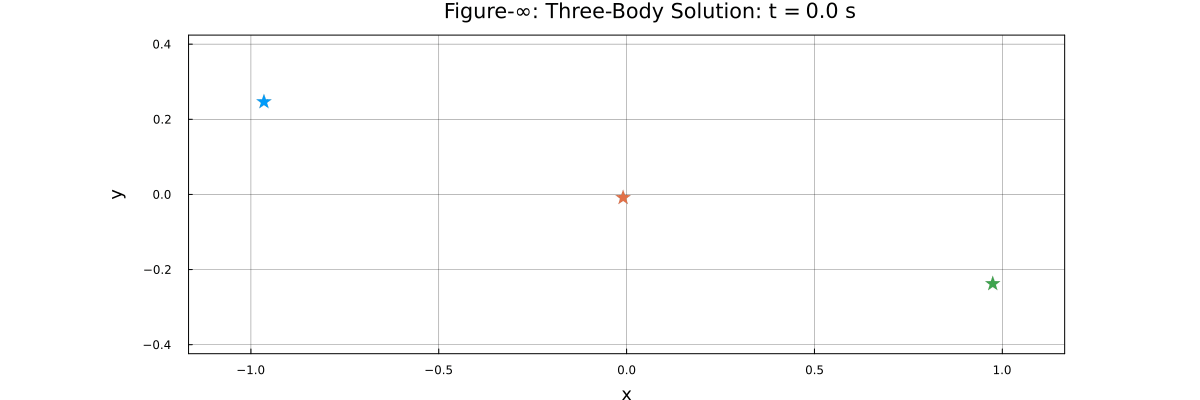

In [7]:
@gif for i in 1:length(tspan)
    p1=plot(size=(1000,400),widen=true,aspect_ratio=:equal,xlims=(-1.1,1.1),ylims=(-0.4,0.4),xlabel="x",ylabel="y",title="Figure-∞: Three-Body Solution: t = ",
    background_color=:white,gridalpha=0.5,minorgridalpha=0.3,framestyle=:box,margins=4mm,titlefonthalign=:left,titlefontsize=14,guidefontsize=10,labelfontsize=12)
    p1=annotate!([(0.48,0.49,("$(round(tspan[i],sigdigits=3)) s",14,:black,:left))])
    p1=plot!(x_results[1,1:i],y_results[1,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=plot!(x_results[2,1:i],y_results[2,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=plot!(x_results[3,1:i],y_results[3,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=scatter!([x_results[1,i]],[y_results[1,i]],label="",marker=:star,c=1,markerstrokewidth=0,markersize=8)
    p1=scatter!([x_results[2,i]],[y_results[2,i]],label="",marker=:star,c=2,markerstrokewidth=0,markersize=8)
    p1=scatter!([x_results[3,i]],[y_results[3,i]],label="",marker=:star,c=3,markerstrokewidth=0,markersize=8)
    r12 = √((x_results[1,i]-x_results[2,i])^2+(y_results[1,i]-y_results[2,i])^2); r13 = √((x_results[1,i]-x_results[3,i])^2+(y_results[1,i]-y_results[3,i])^2); r23 = √((x_results[3,i]-x_results[2,i])^2+(y_results[3,i]-y_results[2,i])^2)
    plot(p1,size=(1200,400))
end every 10